# Phase 2 Assessment 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Section 1 --- Python Fundamentals

Question 1:

    Given an array of N length, return the object in the array that appears most frequently. In the case of a tie, return the object that appears first in the array.

    If every object appears at the same frequency, return None.

    Only the standard library and while and for loops should be used.

    I.E.


    [1,2,3,4] -> None

    [1,1,2,2,3,4,5] -> 1. Even though 1 and 2 appear the same amount of times, 1 appears first.

    [1,1,2,2,2,] -> 2

In [45]:
def most_frequent(arr):
    # We will need to iterate through an array
    for i in arr:
        j = arr[i] + 1
        # Let's use the count method in order to count duplicates in our elements
        if arr.count(i) > 1:
            # We will need a nested if statement to compare the element count to each other
            if arr.count(i) > arr.count(j):
                return arr.count(i)
            elif arr.count(i) == arr.count(j):
                return None
            else:
                return arr.count(j)
        # For when there are no duplicates in the array
        else:
            return None
        
        

try:
    assert( most_frequent([1,2,3,4,5]) == None)
    assert( most_frequent([1,2,3,4,5,"a","b","a"]) == "a")
    assert( most_frequent([1,2,3,4,-5,"a",100,6,"b",-5]) == -5)
    print("Correct")
except AssertionError:
    print("Incorrect")

Incorrect


Question 2:

    Bubblesort works as follows.
    
    
    It will compare an object in the array with the next object in the array. If the current object is larger than the next object, it will swap the two elements. It will do this until the array is sorted.
    
    
    https://upload.wikimedia.org/wikipedia/commons/5/54/Sorting_bubblesort_anim.gif
    https://upload.wikimedia.org/wikipedia/commons/0/06/Bubble-sort.gif
    
    
    Implement Bubble Sort.
    Explain the Time Complexity of your implementation, and the space complexity of your implementation.
    While optimization is prefered, it is not necessary.
    

In [41]:
def bubble_sort(arr):
    # olen simply for optimized length 
    olen = len(arr) - 1
    # First, iterate through the array
    # We do not need to compare all elements, therefore we go in range (len(arr) - 1) to optimize
    for i in range(olen):
        # Set default
        switch = False
        # Nested iteration so that we compare our indexes within our array to each other
        for j in range(olen - i):
            # Current object is greater than the object to the right, therefore we bubble [sort]
            if arr[j] > arr[j + 1]:
                # Our default is no longer false
                switch = True
                # Here we actually swap the elements
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
        # Once array is sorted, break
        if not switch:
            break  
    return arr

bubble_sort([2, 4, 3, 1, 5])

# The time complexity of the bubble sort in O(n^2) (due to the nested for loops), unless the array is already sorted, which it is O(n)
# The space complexity is a constant O(1) due to the amount of space required for this sort method being fixed

[1, 2, 3, 4, 5]

#### Section 2 --- Pandas Fundamentals

Question 1:
    
    Write your answers in the code blocks below.
    
    
    
    a) What are the two fundamental data structures in Pandas. How are they related?  
    b) What is Vectorization?

In [ ]:
#A

# Series and DataFrames are the fundamental data structures in Pandas. 
# We could imagine series as a collection of objects

In [ ]:
#B

# Vectorization is the application of mathematical operations on a set of values (ie: an array)

Question 2:

    Using Pandas, return these values from the Titanic Dataframe.
    
    a) The Average Age
    b) The amount of Null Ages
    c) The count of all women that survived
    d) The Passenger who survived with the longest name.
    

In [3]:
# Use this cell to import the Titanic CSV. Either use the weblink, or the csv that is in the Week 24 Folder.
titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")

In [7]:
## A

age = titanic['Age']
# Let's create the formula for the average sum by dividing the sum of the passengers' ages by the number of passengers (891)
avg_age = age.sum() / 891
avg_age

# Additionally, we could calculate the avg age without the null values by subtracting the isnull().sum() from 891
# avg_age_wo_null = age.sum() / 714

23.79929292929293

In [10]:
## B
null_age = titanic['Age'].isnull().sum()
null_age

177

In [39]:
## C

sex = titanic['Sex']
female = sex.str.contains('female')
titanic.loc[female]
# 314 women survived


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [29]:
## D

# str.len() gets the length of each string in the column
lengths = titanic['Name'].str.len()
# Use numpy where method to establish condition where we compare the length of the string to the max length in our column
argmax = np.where(lengths == lengths.max())[0]
# Print out a [smaller] DataFrame representing the passenger with the longest name & surrounding info
titanic.iloc[argmax]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9,C65,C


#### Section 3 --- Numpy and Matplotlib

Question 1:

    a)What is the basic data structrure in Numpy?
    b)What are the characteristics of it?
    c)Why does Numpy prefer this Data Structure?
    d)What are two examples of Data Structures built out of this Data Structure?

In [ ]:
#A 

# Arrays are the basic data structure in Numpy

In [ ]:
#B

# Arrays are homogenous, meaning that they have the same data type throughout the collection of elements

In [ ]:
#C
# Because of the homogeneous nature, arithmetic operations are simpler to compute, 
# and they can handle the direct application of arithmetic operations as opposed to lists

In [ ]:
#C

# Series and by extension DataFrames are built out of arrays
# We also use arrays to create matrices

Question 2:

Using the Titanic dataset, create a histogram that compares the amount of women who survived against the amount of men who survived.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

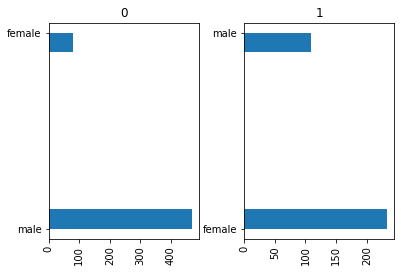

In [38]:
titanic.hist(column='Sex', by='Survived', orientation='horizontal')